# Proyecto Manipulación de datos en base de datos retail

## ¡Llena ese carrito!

### Tabla de contenido

1. Introducción
2. Paso 1. Descripción de los datos
3. Paso 2. Preprocesamiento de los datos
4. Paso 3. Análisis de los datos
5. Conclusion general del proyecto

### Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

1er paso, importar todas las librerias y hacer una visualizacion rapida de los datos.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
# importar librerías

In [8]:
orders = pd.read_csv('./datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('./datasets/products.csv', sep=';')
departments = pd.read_csv('./datasets/departments.csv', sep=';')
aisles = pd.read_csv('./datasets/aisles.csv', sep=';')
order_products = pd.read_csv('./datasets/order_products.csv', sep=';')

# leer conjuntos de datos en los DataFrames

In [13]:
# mostrar información del DataFrame
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [14]:
# mostrar información del DataFrame
products.info()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [15]:
# mostrar información del DataFrame
departments.info()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [16]:
# mostrar información del DataFrame
aisles.info()
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [17]:
# mostrar información del DataFrame
order_products.info()
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [18]:
# Revisa si hay pedidos duplicados

In [19]:
orders[orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [20]:
orders[orders.duplicated(subset='order_id')]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [99]:
orders.duplicated(subset='order_id').sum()

15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [22]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


In [23]:
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

In [100]:
# Elimina los pedidos duplicados

orders.drop_duplicates('order_id')
print(orders.duplicated('order_id').sum())

15


In [26]:
# Vuelve a verificar si hay filas duplicadas

In [103]:
orders[orders.duplicated()].sum()

order_id                  0.0
user_id                   0.0
order_number              0.0
order_dow                 0.0
order_hour_of_day         0.0
days_since_prior_order    0.0
dtype: float64

In [104]:
# Vuelve a verificar si hay IDs duplicados de pedidos
orders.drop_duplicates('order_id', inplace=True)

print(orders.duplicated('order_id').sum())

0


### `products` data frame

In [29]:
# Verifica si hay filas totalmente duplicadas
products[products.duplicated()]


,product_id,product_name,aisle_id,department_id


In [30]:
# Verifica si hay IDs duplicadas de productos
products[products.duplicated(subset='product_id')]

,product_id,product_name,aisle_id,department_id


In [31]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'].str.upper().duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49689     True
49690     True
49691     True
49692     True
49693     True
Name: product_name, Length: 49694, dtype: bool

In [32]:
products['product_name'].str.upper().duplicated().sum()

1361

In [33]:
# Revisa si hay nombres duplicados de productos no faltantes
products[(~products['product_name'].isna()) & (products['product_name'].str.upper().duplicated())]


,product_id,product_name,aisle_id,department_id
2058,2059,Biotin 1000 Mcg,47,11
5455,5456,Green Tea With Ginseng and Honey,96,20
5558,5559,Cream Of Mushroom Soup,69,15
7558,7559,Cinnamon Rolls with Icing,105,13
9037,9038,American Cheese slices,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


Describe brevemente tus hallazgos y lo que hiciste con ellos.


Verificando el DafaFrame products no me aparecen duplicados de products ni de product_id, pero al llamar al metodo upper en la columna product_name y visualizar todos los nombres a mayusculas, aperecen los duplicados. 
Llamo a isna para sacar los produc name que no estan vacios usando la negacion ~, una vez que tengo los no vacios, caso los duplicados que no estan vacios, y en el ultimo punto ya puedo sacarrecen los que realmente estan vacios

### `departments` data frame

In [34]:
# Revisa si hay filas totalmente duplicadas

In [35]:
departments[departments.duplicated()]

,department_id,department


In [36]:
# Revisa si hay IDs duplicadas de productos

In [37]:
departments[departments.duplicated(['department_id'])]


,department_id,department


### `aisles` data frame

In [38]:
# Revisa si hay filas totalmente duplicadas

In [39]:
aisles[aisles.duplicated()]

,aisle_id,aisle


In [40]:
# Revisa si hay IDs duplicadas de productos

In [41]:
aisles[aisles.duplicated(['aisle_id'])]


,aisle_id,aisle


### `order_products` data frame

In [42]:
# Revisa si hay filas totalmente duplicadas

In [43]:
order_products[order_products.duplicated()]

,order_id,product_id,add_to_cart_order,reordered


In [44]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso

In [45]:
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Revise si el Dataframe order_products tenia duplicados, pero me trae ceros, entonces verifique las columnas order_id y product_id ya que son mis llaves principales para buscar si estas podrian tener duplicados. 
El resultado es sin duplicados.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [46]:
# Encuentra los valores ausentes en la columna 'product_name'

In [47]:
products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [48]:
products[products['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.


Al filtrar la culumna product_name usando .isna() y haciendo una suma puedo observan todos los valores ausentes en esta columna. 1258 filas donde produc name esta vacia.

In [49]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

In [50]:
products[(products['product_name'].isna()) & (products['aisle_id'] !=100)]

,product_id,product_name,aisle_id,department_id


In [51]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products['product_name'].isna()) & (products['department_id'] !=21)]

,product_id,product_name,aisle_id,department_id


Describe brevemente cuáles son tus hallazgos.

Observo que todos los productos vacios tienen la isla 100 y el departamento 21, claramente hay un error de los productos de ese pasillo y ese departamento, 

In [52]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.

print(aisles[aisles['aisle_id']==100])
print(departments[departments['department_id']==21])


    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [53]:
# Completa los nombres de productos ausentes con 'Unknown'
products.fillna('unknown', inplace = True)
products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Llenar los valores vacioscon fillna() para no tener que borrar los ID, esto para no perder la informacion que se encuentra en cada uno de ellos. y uso inplace = True para que se guard en la misma tabla. Verifico la informacion lo vuelvo a correr y ya no estan los valores ausentes.

### `orders` data frame

In [54]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [55]:
# Encuentra los valores ausentes
orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [56]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] !=1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [57]:
orders[orders['days_since_prior_order'].isna()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


Primero analizo el DataFrame llamando a .info() en donde observo que days_since_prior_order tiene filas nulas.
Para comprobarlo llamo a .isna() para revisar esa columna.
Se aprecia la columna order_number con 1 en todas sus filas, para esto valido que la informacion sea correcta, pero todos los valores vacios son 1, esto por que es su 1er compra, no tiene con que compararse ya que es su 1er compra.
En lugar de aprecer NaN en la columna days_since_prior_order, yo pondria 0(cero) ya que ese dato hace referencia a que no hay una compra antes.


In [58]:
orders.fillna(0, inplace=True)
orders.isna().sum()


order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

### `order_products` data frame

In [59]:
# Encuentra los valores ausentes
order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [60]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()

(1.0, 64.0)

Describe brevemente cuáles son tus hallazgos.

Llamo el metodo .isna() para revisar si el DataFrame order_products tiene valores vacios,
podemos observar que la columna add_to_cart_order tiene 836 valores vacios, sacando los minimos y maximos observo que el maximo de items en el carrito fue de 64 lo cual suena a muchos.

In [61]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orders_ids_faltantes = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
orders_ids_faltantes = sorted(list(orders_ids_faltantes))
orders_ids_faltantes

[9310,
 61355,
 102236,
 129627,
 165801,
 171934,
 180546,
 264710,
 293169,
 388234,
 404157,
 678116,
 733526,
 747668,
 813364,
 844733,
 854647,
 871281,
 888470,
 903110,
 936852,
 1021563,
 1038146,
 1169835,
 1183255,
 1220886,
 1302315,
 1308785,
 1386261,
 1477139,
 1529171,
 1564093,
 1598369,
 1625713,
 1633337,
 1648217,
 1673227,
 1677118,
 1713430,
 1717990,
 1730767,
 1800005,
 1832957,
 1888628,
 1916118,
 1959075,
 1961723,
 1968313,
 2094761,
 2136777,
 2170451,
 2256933,
 2409109,
 2449164,
 2470674,
 2479011,
 2621907,
 2625444,
 2652650,
 2721963,
 2729254,
 2849370,
 2926893,
 2979697,
 2997021,
 2999801,
 3125735,
 3308010,
 3347453,
 3383594]

Analizaremos si los 64 ítems son reales, voy a iniciar por  las ordenes donde  add_to_cart_order  esta vacío.
Empezamos por order_id y guardo esto en una nueva variable para analizar los orders_ids_faltantes, y filtro por order_productos la columna add_to_cart_order  para sacar de los que estan vacios el order_id y llamo a unique para que traiga los valores unicos.
Cambio la tabla a una lista y lo ordeno con sorted.




In [62]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


In [63]:
order_products.groupby('order_id')['product_id'].count().sort_values()

order_id
3421079      1
1288686      1
1288764      1
1288825      1
1288873      1
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 450046, dtype: int64

In [64]:
order_products[order_products['order_id'].isin(orders_ids_faltantes)].groupby('order_id')['product_id'].count().sort_values()

order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

In [65]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

In [105]:
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')
order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Quiero saber si todas las órdenes que están vacías tienen más de 64 productos o bien cuántos productos tienen, para esto quiero contar los productos que tiene cada order_id y  product_id llamó a groupby y cuento los productos por orden depues los ordeno. de mayor a menor con  ascending = False.
Ahora me aparece que una orden tiene 127 pero el mexico es 64, entonces el sistema no registro la información  de esas órdenes que se encuentra como nulo.

Entonces llamo a .isin()  para saber que está dentro de cada una de esas órdenes, para saber si mis ordenes vacias corresponden a las nulas.
Reemplazamos los valores ausentes con .fillna() de add_to_car con 999 para que dejen de aparecer como nulo y que sea entero.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [67]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  478967 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [68]:
orders['order_hour_of_day'].value_counts().sort_index()

0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [69]:
orders['order_dow'].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [70]:
shopping_hour_of_day = orders['order_hour_of_day'].value_counts().sort_index()
shopping_hour_of_day

0      3180
1      1763
2      1004
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

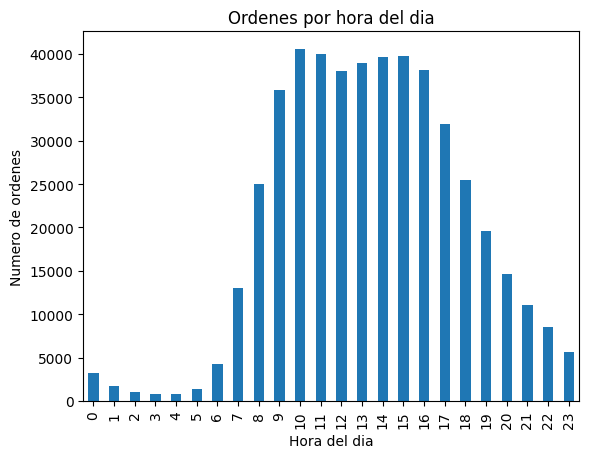

In [71]:
shopping_hour_of_day.plot(
    kind='bar',
    title='Ordenes por hora del dia',
    xlabel='Hora del dia',
    ylabel='Numero de ordenes'
)
plt.show()

### [A3] ¿Qué día de la semana compran víveres las personas?

In [72]:
orders_per_day = orders.groupby('order_dow')['order_id'].count().sort_index()
orders_per_day

order_dow
0    84090
1    82185
2    65833
3    60912
4    59810
5    63488
6    62649
Name: order_id, dtype: int64

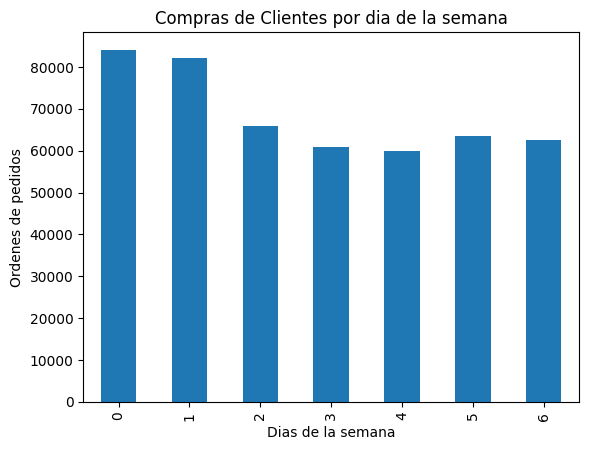

In [73]:
#Grafico

orders_per_day.plot(
    kind='bar',
    title='Compras de Clientes por dia de la semana',
    xlabel='Dias de la semana',
    ylabel='Ordenes de pedidos'
)
plt.show()



La grafica muestra que los clientes hacen sus compras los dias domingos, tal vez esto se debe a a que son usualmente sus dias de descanso.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [74]:
order_time = orders['days_since_prior_order'].min(), orders['days_since_prior_order'].max()
order_time

(0.0, 30.0)

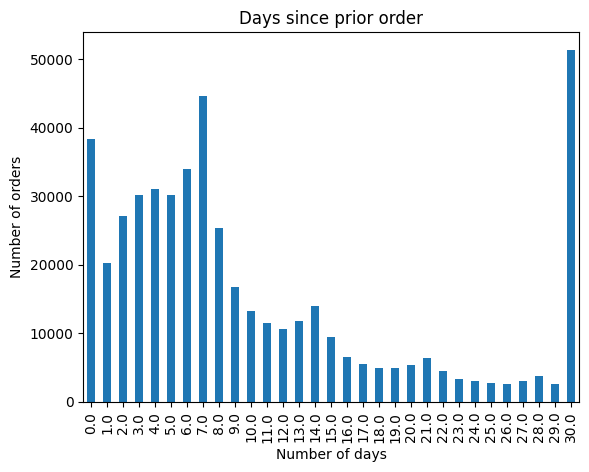

In [75]:
#Grafico

orders['days_since_prior_order'].value_counts().sort_index().plot(kind='bar',
                                                                  title='Days since prior order',
                                                                  xlabel='Number of days',
                                                                  ylabel='Number of orders'
                                                                 )
plt.show()



La mayoria de las personas tardan como maximo 30 días para volver a hacer un pedido.
Aun que la grafica muestra que una gran parte tambien hace pedidos cada semana.


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [76]:
wednesday_filter = orders['order_dow'] ==3

In [77]:
orders_wednesday = orders[wednesday_filter]['order_hour_of_day'].value_counts().sort_index()

In [78]:
orders_wednesday

0      373
1      215
2      121
3      101
4      108
5      170
6      643
7     1732
8     3125
9     4490
10    5026
11    5004
12    4688
13    4674
14    4774
15    5163
16    4976
17    4175
18    3463
19    2652
20    1917
21    1450
22    1154
23     718
Name: order_hour_of_day, dtype: int64

In [79]:
saturday_filter = orders['order_dow'] ==6

In [80]:
orders_saturday = orders[saturday_filter]['order_hour_of_day'].value_counts().sort_index()

In [81]:
orders_saturday

0      464
1      254
2      177
3      125
4      118
5      161
6      451
7     1619
8     3246
9     4311
10    4919
11    5116
12    5132
13    5323
14    5375
15    5188
16    5029
17    4295
18    3338
19    2610
20    1847
21    1473
22    1185
23     893
Name: order_hour_of_day, dtype: int64

In [82]:
wednesday_saturday = pd.concat([orders_saturday, orders_wednesday], axis = 1)

In [83]:
wednesday_saturday.columns = ['Saturday', 'wednesday']
wednesday_saturday

,Saturday,wednesday
0,464,373
1,254,215
2,177,121
3,125,101
4,118,108
5,161,170
6,451,643
7,1619,1732
8,3246,3125
9,4311,4490


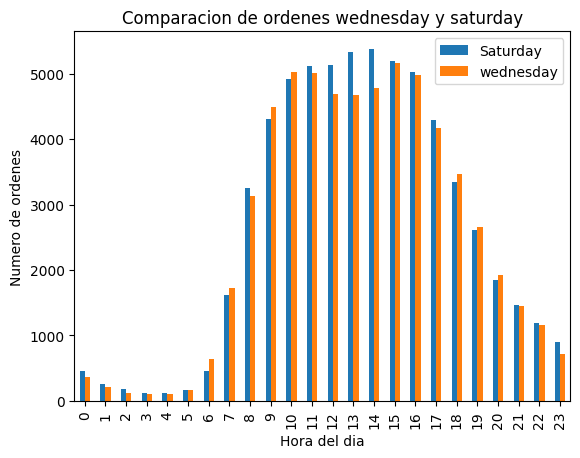

In [84]:
wednesday_saturday.plot(
    kind='bar',
    title='Comparacion de ordenes wednesday y saturday',
    xlabel='Hora del dia',
    ylabel='Numero de ordenes'
)
plt.show()



El grafico nos muestra que la mayoria de las personas hacen sus compras los días sabados, seguramente por que son horarios en los que no se encuentran laborandoo bien por que es la hora que salen a comer.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [85]:
totalOrdersByUser = orders.groupby('user_id')['order_number'].count().sort_values(ascending=False)
totalOrdersByUser


user_id
149605    28
193164    26
78375     25
66664     24
148162    24
          ..
121642     1
56614      1
56611      1
56608      1
157554     1
Name: order_number, Length: 157437, dtype: int64

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [86]:
df_merge = order_products.merge(products, on='product_id')
top_ordered_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=True)

In [87]:
top_ordered_products

product_id  product_name                                                 
37535       Voluminous Extra-Volume Collagen Mascara - Blackest Black 680        1
11183       Gluten Free Wheat Free Chocolate Cake Mix                            1
3719        Dark Brown Henna Cream                                               1
13788       Sweet Tangerine All Good Lips SPF 12 Lip Balm with Clear Zinc        1
32383       Homestyle Gravy Mix                                                  1
                                                                             ...  
47209       Organic Hass Avocado                                             29773
21903       Organic Baby Spinach                                             33971
21137       Organic Strawberries                                             37039
13176       Bag of Organic Bananas                                           53297
24852       Banana                                                           66050
Length: 45573

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [88]:
total_products_orders = order_products.groupby('order_id')['product_id'].count()

In [89]:
histograma_valores = total_products_orders.value_counts().sort_index()

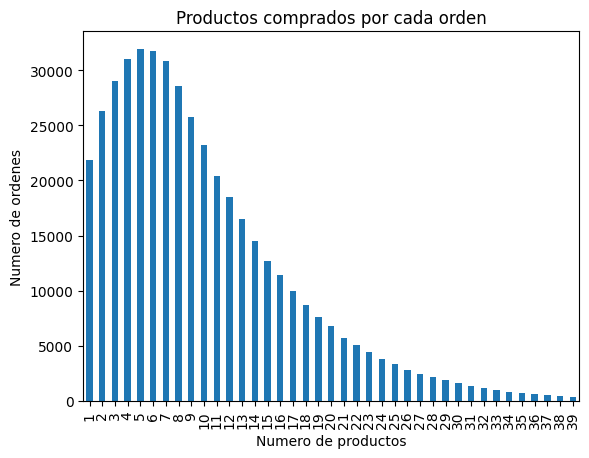

In [90]:
histograma_valores[histograma_valores.index < 40].plot(
    kind='bar',
    title='Productos comprados por cada orden',
    xlabel='Numero de productos',
    ylabel='Numero de ordenes'
)
plt.show()
    

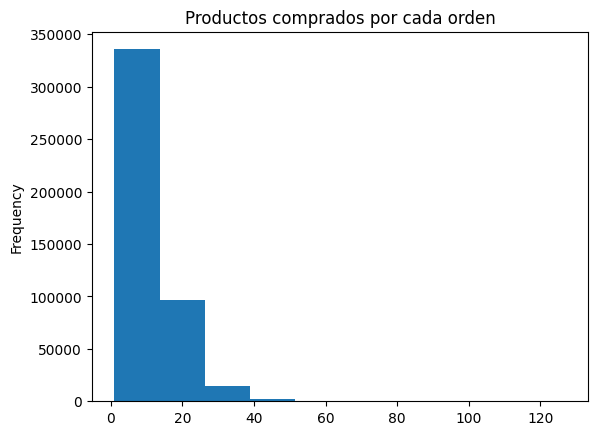

In [91]:
total_products_orders.plot(
    kind='hist',
    title='Productos comprados por cada orden',
    xlabel='Numero de productos',
    ylabel='Numero de ordenes'
    
)
plt.show()

In [92]:
total_products_orders

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

Sin duda alguna muestra de manera más clara el orden en que se vuelven a pedir con mayor frecuencia los articulos y sus nombres.
Modifique .sort_values(ascending=True)  a False y la grafica me muestra mas claro el resultado.

In [93]:
reorder_products = order_products[order_products['reordered'] == 1]


In [94]:
df_merge = reorder_products.merge(products, on='product_id')
top_reordered_products = df_merge.groupby(['product_id', 'product_name']).size().sort_values(ascending=False)

In [95]:
print(top_reordered_products.head(20))

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
dtype: int64


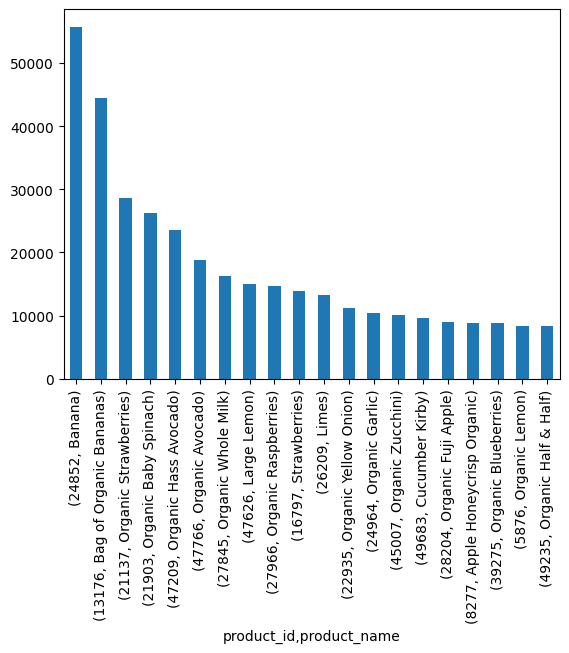

In [96]:
#Grafico... cuando lo cargo hace que se muera el kernel

top_reordered_products.head(20).plot(kind='bar', x='product_name', y='product_id')
plt.show()

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [97]:
order_products_merged_with_products = order_products.merge(products, on='product_id')
reorderedAvgByProduct = order_products_merged_with_products.groupby(['product_id','product_name'])['reordered'].mean()
reorderedAvgByProduct

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [91]:
df_merge = order_products.merge(orders)
reorder_pct = df_merge.groupby('user_id')['reordered'].mean()
reorder_pct


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64

In [92]:
reorder_pct_as_df = reorder_pct.sort_values(ascending=False).reset_index()
reorder_pct_as_df

,user_id,reordered
0,96430,1.0
1,69003,1.0
2,199910,1.0
3,203290,1.0
4,140076,1.0
...,...,...
149621,190953,0.0
149622,119371,0.0
149623,63173,0.0
149624,63163,0.0


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [93]:
df_merge = order_products.merge(products)
first_in_cart = df_merge[df_merge['add_to_cart_order'] == 1]
first_in_cart


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
6,1463503,11440,1,0,Chicken Breast Tenders Breaded,129,1
17,2201430,11440,1,1,Chicken Breast Tenders Breaded,129,1
21,1036054,11440,1,1,Chicken Breast Tenders Breaded,129,1
50,3008652,11440,1,1,Chicken Breast Tenders Breaded,129,1
62,2946144,11440,1,1,Chicken Breast Tenders Breaded,129,1
...,...,...,...,...,...,...,...
4544972,1518168,16952,1,0,Sensitive Night Cream,73,11
4544977,1776450,21507,1,0,Gluten Free All-Purpose Rice Flour Blend,17,13
4544995,2333206,25467,1,0,Madagascar Pure Vanilla,17,13
4545005,532895,8182,1,0,Total Mint Stripe Gel Toothpaste,20,11


In [94]:
first_count = first_in_cart.groupby(['product_id', 'product_name'])['product_id'].count().sort_values(ascending=False)
first_count

product_id  product_name                                               
24852       Banana                                                         15562
13176       Bag of Organic Bananas                                         11026
27845       Organic Whole Milk                                              4363
21137       Organic Strawberries                                            3946
47209       Organic Hass Avocado                                            3390
                                                                           ...  
10981       Cloud White Decorating Cupcake Icing                               1
10985       Premium Twin Pack Rock Cornish Game Hen                            1
38272       Organic Raw Coconut Flour                                          1
10989       Garbage Disposal Freshener & Cleaner Red Pear with Magnolia        1
36996       Cool Sport Spray-On Sunscreen SPF 50                               1
Name: product_id, Length: 26760, dtyp

In [95]:
first_count_as_df = first_count.reset_index(name='count')
first_count_as_df.head(20)

,product_id,product_name,count
0,24852,Banana,15562
1,13176,Bag of Organic Bananas,11026
2,27845,Organic Whole Milk,4363
3,21137,Organic Strawberries,3946
4,47209,Organic Hass Avocado,3390
5,21903,Organic Baby Spinach,3336
6,47766,Organic Avocado,3044
7,19660,Spring Water,2336
8,16797,Strawberries,2308
9,27966,Organic Raspberries,2024


Escribe aquí tus conclusiones

### Conclusion general del proyecto:

Considero este es un proyecto desafiante, me encontre con muchas dudas al llevarlo a cavo, tuve que pedir asesoria de Erick, 
Al hacer el analisis de los datos a primera vista esta todo bien, conforme vas adentrandote analizando y vizualizando mas a fondo te encuentras 
con informacion que no fue registrada, con datos faltantes, datos duplicados, en los cuales use los metodos que te ayudan a solucionar ese problema y darle una nueva vizualizacion a los datos.


